# Análisis Exploratorio

TODO
- [x] Comience describiendo cuantas variables y observaciones tiene disponibles, el tipo de cada una de las variables.
- [x] Haga un resumen de las variables numéricas e investigue si siguen una distribución normal y tablas de frecuencia para las variables categóricas, escriba lo que vaya encontrando.
- [ ] Encoding de las variables categóricas.
- [x] Arreglar estado_pil
- [ ] Cruce las variables que considere que son las más importantes para hallar los elementos clave que lo pueden llevar a comprender lo que está causando el problema encontrado.
- [ ] Haga gráficos exploratorios que le de ideas del estado de los datos.
- [ ] Haga un agrupamiento (clustering) e interprete los resultados. 

In [440]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set seeds for reproducibility
np.random.seed(2024)
seed = 2024

In [441]:
# Load the data
df_2011 = pd.read_csv('data/2011.csv')
df_2013 = pd.read_csv('data/2013.csv')
df_2014 = pd.read_csv('data/2014.csv')
df_2016 = pd.read_csv('data/2016.csv')
df_2017 = pd.read_csv('data/2017.csv')
df_2018 = pd.read_csv('data/2018.csv')
df_2019 = pd.read_csv('data/2019.csv')
df_2020 = pd.read_csv('data/2020.csv')
df_2022 = pd.read_csv('data/2022.csv')

In [442]:
# Concatenate the data with only the columns that are present in the df_2011
df = pd.concat([
    df_2011,
    df_2013,
    df_2014,
    df_2016,
    df_2017,
    df_2018,
    df_2019,
    df_2020,
    df_2022
], axis=0, ignore_index=True)

In [443]:
df.head()

,dia_ocu,mes_ocu,dia_sem_ocu,hora_ocu,depto_ocu,zona_ocu,sexo_pil,edad_pil,mayor_menor,estado_pil,tipo_vehi,marca_vehi,causa_acc,year
0,27,Junio,Lunes,17,Guatemala,10,Hombre,42,Mayor,Normal,Automovil,Audi,Colisión,2011
1,18,Septiembre,Domingo,0,Guatemala,7,Hombre,25,Mayor,Ebrio,Automovil,Audi,Empotro,2011
2,5,Octubre,Miercoles,19,Quetzaltenango,Ignorado,Hombre,26,Mayor,Ebrio,Automovil,Audi,Colisión,2011
3,15,Febrero,Martes,12,Izabal,Ignorado,Hombre,59,Mayor,Ignorado,Camioneta,Land rover,Colisión,2011
4,17,Junio,Viernes,18,Guatemala,11,Mujer,25,Mayor,Normal,Camioneta,Land rover,Colisión,2011


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76792 entries, 0 to 76791
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dia_ocu      76792 non-null  int64 
 1   mes_ocu      76792 non-null  object
 2   dia_sem_ocu  76792 non-null  object
 3   hora_ocu     76792 non-null  object
 4   depto_ocu    76792 non-null  object
 5   zona_ocu     76792 non-null  object
 6   sexo_pil     76792 non-null  object
 7   edad_pil     76792 non-null  object
 8   mayor_menor  76792 non-null  object
 9   estado_pil   76792 non-null  object
 10  tipo_vehi    76792 non-null  object
 11  marca_vehi   76792 non-null  object
 12  causa_acc    76792 non-null  object
 13  year         76792 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 8.2+ MB


In [445]:
# Separate numerical and categorical columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns
categorical = df.select_dtypes(include=['object']).columns

In [446]:
# Numerical NA's
df[numerical].isna().sum()

dia_ocu    0
year       0
dtype: int64

Dada la naturaleza con la que la información fue recolectada, los datos no son consistentes en cuanto a sus mayúsculas y minúsculas. Tampoco se tienen valores nulos, si no que aparecen como "ignorado", por lo que es necesario su tratamiento.

In [447]:
# To lower Case
df[categorical] = df[categorical].apply(lambda x: x.str.lower())

## Corrección de variables

In [448]:
# Categorical variables
for col in categorical:
    # Print them sorted
    print(df[col].value_counts().sort_index())

mes_ocu
abril         6583
agosto        6484
diciembre     6612
enero         6646
febrero       6603
julio         6330
junio         6206
marzo         7090
mayo          6466
noviembre     5841
octubre       5500
septiembre    5767
septiemre      664
Name: count, dtype: int64
dia_sem_ocu
domingo      13992
jueves        9648
lunes        10108
martes        8836
miercoles     3629
miércoles     5309
sabado        5557
sábado        8780
viernes      10933
Name: count, dtype: int64
hora_ocu
0           1098
1            714
10           662
11           774
12           719
13           759
14           863
15           997
16           912
17          1189
18          1261
19          1463
2            527
20          1437
21          1414
22          1254
23          1115
3            408
4            291
5            414
6            543
7            702
8            645
9            608
ignorada      15
Name: count, dtype: int64
depto_ocu
alta verapaz       2933
alta verpaz     

Muchos datos están inconsistentes por culpa de las tíldes, por lo que se procede a corregirlos.

In [449]:
accented_vowels = {
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u',
    'Á': 'A',
    'É': 'E',
    'Í': 'I',
    'Ó': 'O',
    'Ú': 'U'
}

df.replace(accented_vowels, regex=True, inplace=True)

# Replace all 'ignorada' and 'ignorado' with 'NA' in the categorical columns
df[categorical] = df[categorical].replace(['ignorada', 'ignorado'], np.nan)

También algunos están mal escritos

In [450]:
df['depto_ocu'] = df['depto_ocu'].replace('alta verpaz', 'alta verapaz')
df['mes_ocu'] = df['mes_ocu'].replace('septiemre', 'septiembre')
df['causa_acc'] = df['causa_acc'].replace('volco', 'vuelco')
df['tipo_vehi'] = df['tipo_vehi'].replace('moto taxi', 'mototaxi')
# df['causa_acc'] = df['causa_acc'].replace('choque', 'colision')

Existen algunos valores en _estado\_pil_ con valor numérico. En base al diccionario de variables proveído por el INE, son cambiados

In [451]:
df['estado_pil'] = df['estado_pil'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9'], 'ebrio')
df['estado_pil'] = df['estado_pil'].replace(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19'], 'no ebrio')
df['estado_pil'] = df['estado_pil'].replace('normal', 'no ebrio')

In [452]:
# Categorical variables
for col in categorical:
    # Print them sorted
    print(df[col].value_counts().sort_index())

mes_ocu
abril         6583
agosto        6484
diciembre     6612
enero         6646
febrero       6603
julio         6330
junio         6206
marzo         7090
mayo          6466
noviembre     5841
octubre       5500
septiembre    6431
Name: count, dtype: int64
dia_sem_ocu
domingo      13992
jueves        9648
lunes        10108
martes        8836
miercoles     8938
sabado       14337
viernes      10933
Name: count, dtype: int64
hora_ocu
0     1098
1      714
10     662
11     774
12     719
13     759
14     863
15     997
16     912
17    1189
18    1261
19    1463
2      527
20    1437
21    1414
22    1254
23    1115
3      408
4      291
5      414
6      543
7      702
8      645
9      608
Name: count, dtype: int64
depto_ocu
alta verapaz       3006
baja verapaz       1328
chimaltenango      2866
chiquimula         1652
el progreso        1780
escuintla          6055
guatemala         30020
huehuetenango      1546
izabal             2689
jalapa             1136
jutiapa           

Arreglando los valores nulos, se convierten en columnas numéricas

In [453]:
import numpy as np

df['hora_ocu'] = df['hora_ocu'].replace('NA', np.nan).astype(float)
df['zona_ocu'] = df['zona_ocu'].replace('NA', np.nan).astype(float)
df['edad_pil'] = df['edad_pil'].replace('NA', np.nan).astype(float)

categorical = categorical.drop(['hora_ocu', 'zona_ocu', 'edad_pil'])
numerical = numerical.append(pd.Index(['hora_ocu', 'zona_ocu', 'edad_pil']))

## Análisis de variables

### Ajuste de valores nulos

In [454]:
df[categorical].isnull().sum()

mes_ocu            0
dia_sem_ocu        0
depto_ocu          0
sexo_pil        9603
mayor_menor    12572
estado_pil     45844
tipo_vehi       4247
marca_vehi     21676
causa_acc         27
dtype: int64

In [455]:
df[numerical].isnull().sum()

dia_ocu         0
year            0
hora_ocu    56023
zona_ocu    56425
edad_pil    16871
dtype: int64

#### Categóricas
- _mayor\_menor_: Si la edad es menor a 18 años, se considerará menor, de lo contrario, mayor.
- _sexo\_pil_: los valores nulos serán seleccionados aleatoriamente.
- _estado\_pil_: los valores no especificados se representarán en una nueva categoría.
- _marca\_vehi_: los valores nulos se representarán en una nueva categoría.
- _tipo\_vehi_: los valores nulos serán seleccionados aleatoriamente.
- _causa\_acc_: se eliminará esas observaciones al no ser una cantidad de datos relevantes.

#### Numéricas
- _hora\_ocu_: los valores nulos serán reemplazados por la moda y será representado por una nueva columna.
- _zona\_ocu_: esta característica no es relevante para el análisis y contiene una cantidad significativa de datos nulos; por lo que se eliminará.
- _edad\_pil_: los valores nulos serán reemplazados por la mediana y será representado por una nueva columna.

In [456]:
# Categorical variables
df['mayor_menor'] = np.where(df['edad_pil'] < 18, 'menor', 'mayor')


df['sexo_pil'] = df['sexo_pil'].fillna(
    df['sexo_pil'].sample(frac=1, random_state=seed).iloc[0]
)

df['estado_pil'] = df['estado_pil'].fillna('no especificado')

df['marca_vehi'] = df['marca_vehi'].fillna('no especificado')

df['tipo_vehi'] = df['tipo_vehi'].fillna(
    df['tipo_vehi'].sample(frac=1, random_state=seed).iloc[0]
)

df = df.dropna(subset=['causa_acc'])


# Numerical variables
df = df.drop(columns=['zona_ocu'])
numerical = numerical.drop('zona_ocu')

df['hora_ocu_missing'] = df['hora_ocu'].isna().astype(str)
categorical = categorical.append(pd.Index(['hora_ocu_missing']))
df['hora_ocu'] = df['hora_ocu'].fillna(df['hora_ocu'].mode()[0])

df['edad_pil_missing'] = df['edad_pil'].isna().astype(str)
categorical = categorical.append(pd.Index(['edad_pil_missing']))
df['edad_pil'] = df['edad_pil'].fillna(df['edad_pil'].median())

### Distribución de las variables
#### Categóricas

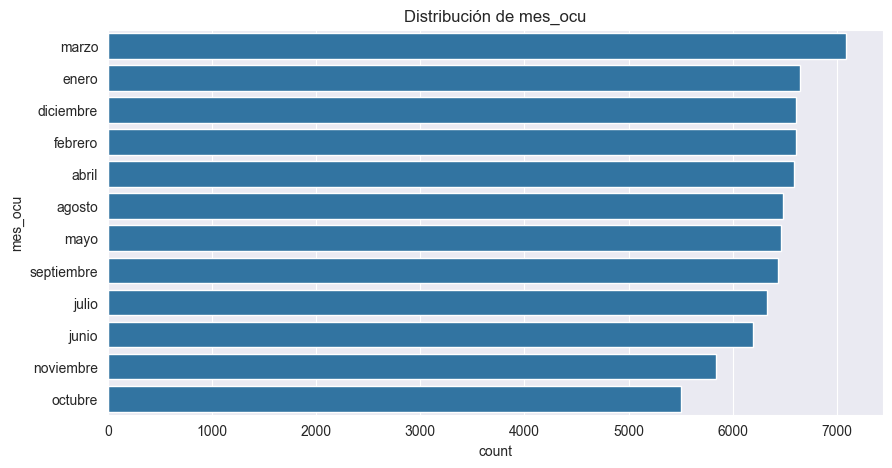

mes_ocu
marzo         0.092321
enero         0.086576
diciembre     0.086068
febrero       0.086016
abril         0.085755
agosto        0.084453
mayo          0.084205
septiembre    0.083775
julio         0.082420
junio         0.080701
noviembre     0.076089
octubre       0.071621
Name: proportion, dtype: float64


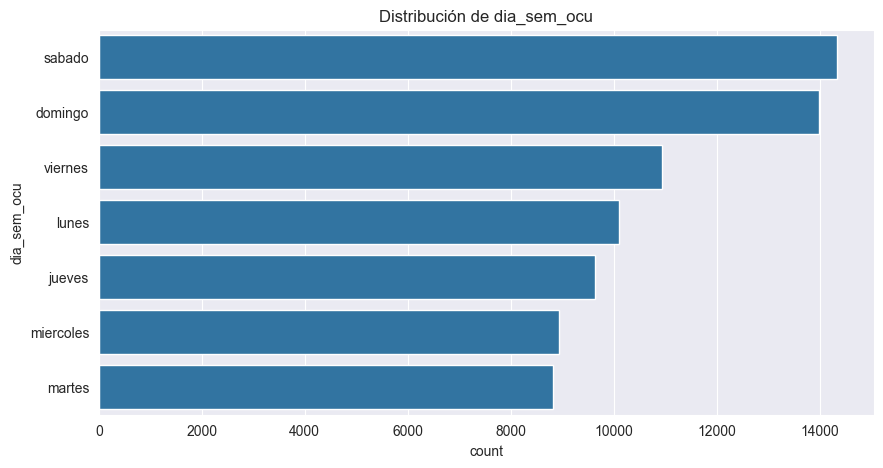

dia_sem_ocu
sabado       0.186752
domingo      0.182231
viernes      0.142383
lunes        0.131636
jueves       0.125630
miercoles    0.116394
martes       0.114974
Name: proportion, dtype: float64


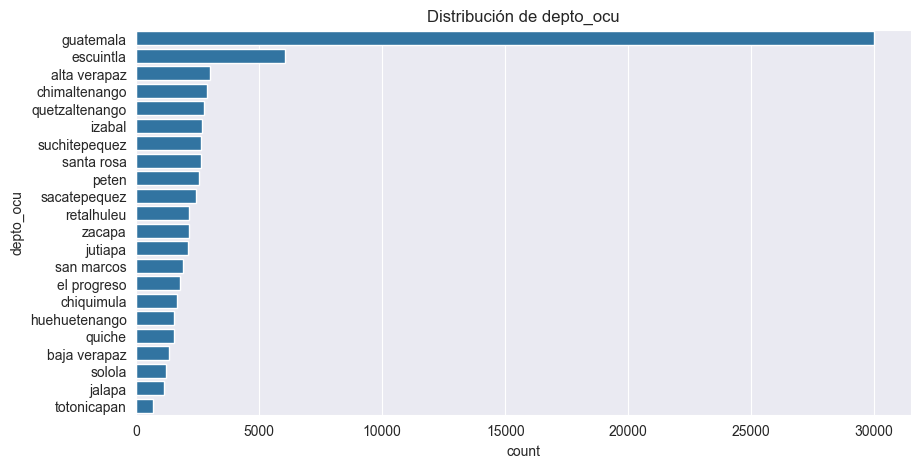

depto_ocu
guatemala         0.390881
escuintla         0.078877
alta verapaz      0.039158
chimaltenango     0.037309
quetzaltenango    0.035824
izabal            0.035029
suchitepequez     0.034417
santa rosa        0.034039
peten             0.032971
sacatepequez      0.031629
retalhuleu        0.028125
zacapa            0.027851
jutiapa           0.027369
san marcos        0.024998
el progreso       0.023175
chiquimula        0.021520
huehuetenango     0.020139
quiche            0.020126
baja verapaz      0.017287
solola            0.015906
jalapa            0.014785
totonicapan       0.008585
Name: proportion, dtype: float64


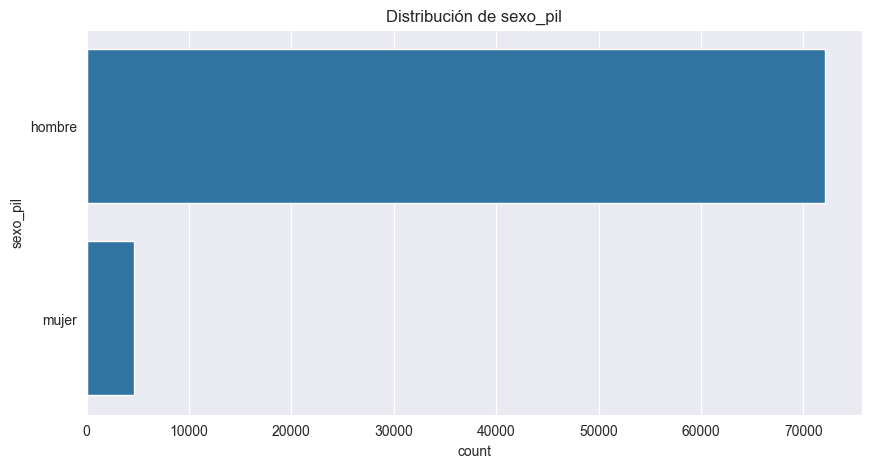

sexo_pil
hombre    0.939022
mujer     0.060978
Name: proportion, dtype: float64


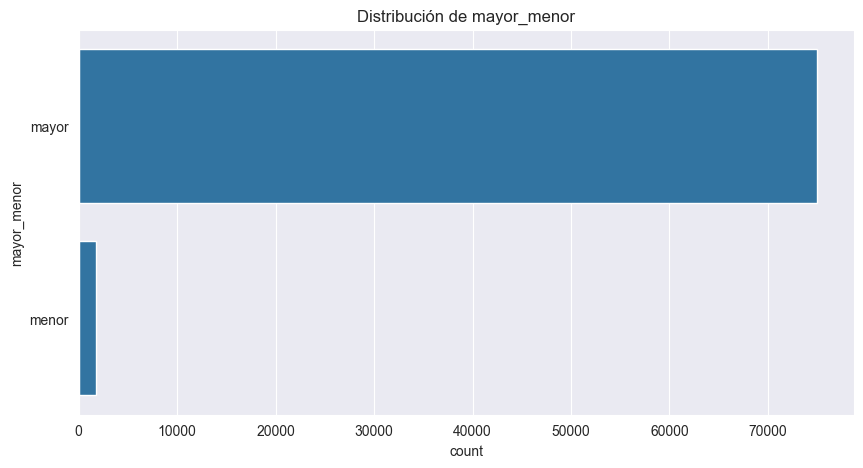

mayor_menor
mayor    0.976409
menor    0.023591
Name: proportion, dtype: float64


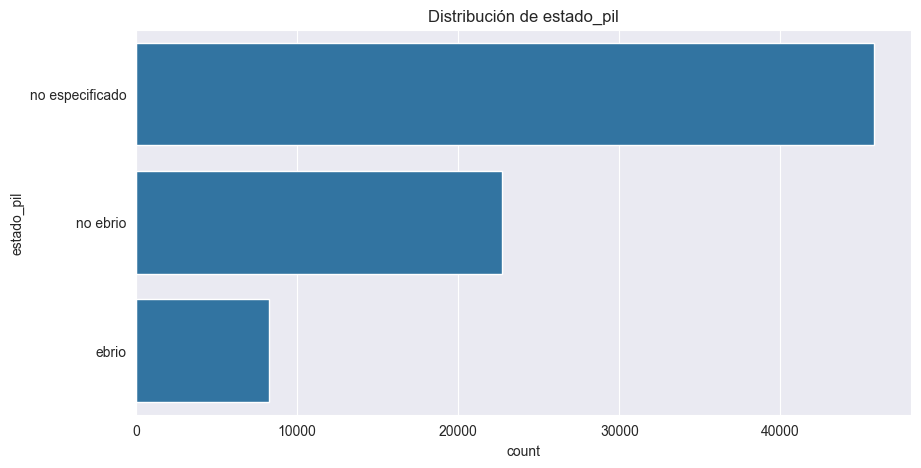

estado_pil
no especificado    0.596861
no ebrio           0.295551
ebrio              0.107588
Name: proportion, dtype: float64


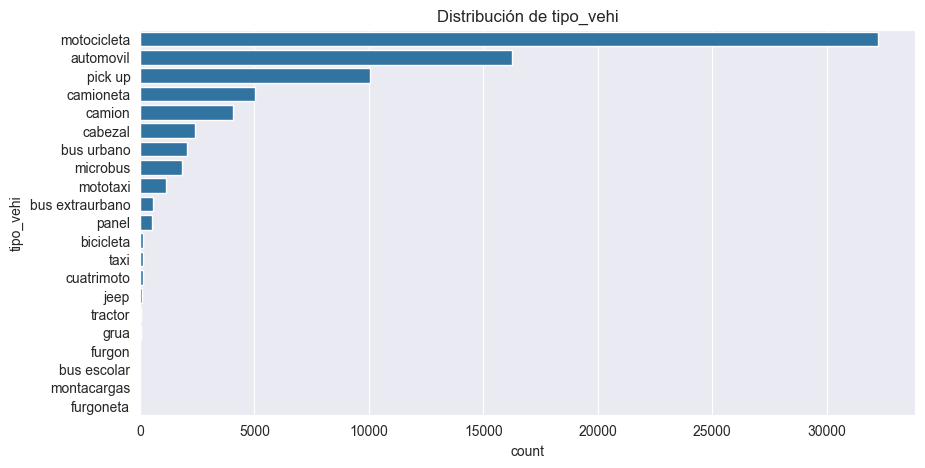

tipo_vehi
motocicleta        0.420191
automovil          0.211659
pick up            0.131010
camioneta          0.065290
camion             0.053084
cabezal            0.031108
bus urbano         0.026692
microbus           0.024034
mototaxi           0.014798
bus extraurbano    0.007191
panel              0.006982
bicicleta          0.001954
taxi               0.001928
cuatrimoto         0.001707
jeep               0.001264
tractor            0.000664
grua               0.000287
furgon             0.000078
bus escolar        0.000039
montacargas        0.000026
furgoneta          0.000013
Name: proportion, dtype: float64


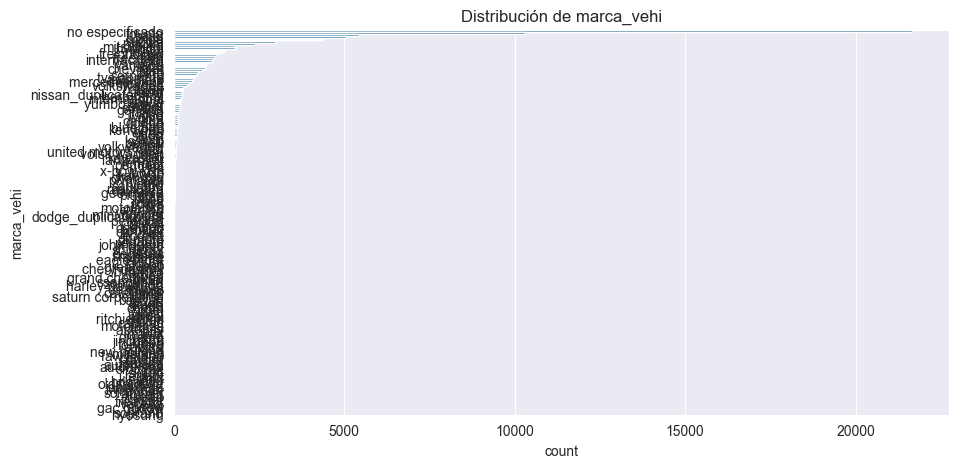

marca_vehi
no especificado    0.282056
toyota             0.134150
bajaj              0.070761
honda              0.065655
suzuki             0.057122
                     ...   
automosa           0.000013
raybar             0.000013
chrisler           0.000013
faw jiabao         0.000013
hyosung            0.000013
Name: proportion, Length: 177, dtype: float64


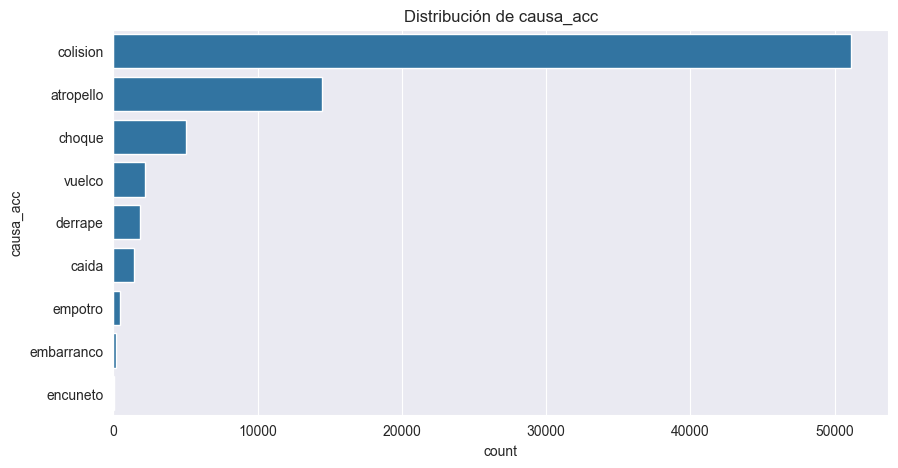

causa_acc
colision      0.666580
atropello     0.188536
choque        0.065264
vuelco        0.028359
derrape       0.024113
caida         0.018641
empotro       0.006292
embarranco    0.002084
encuneto      0.000130
Name: proportion, dtype: float64


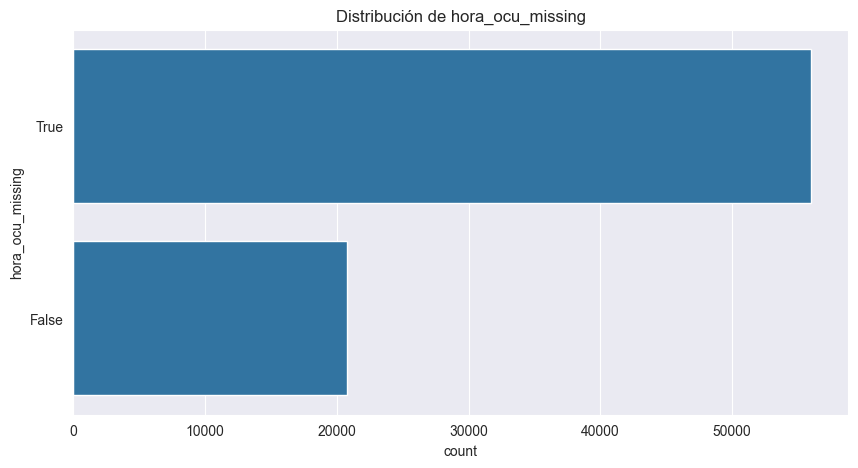

hora_ocu_missing
True     0.72959
False    0.27041
Name: proportion, dtype: float64


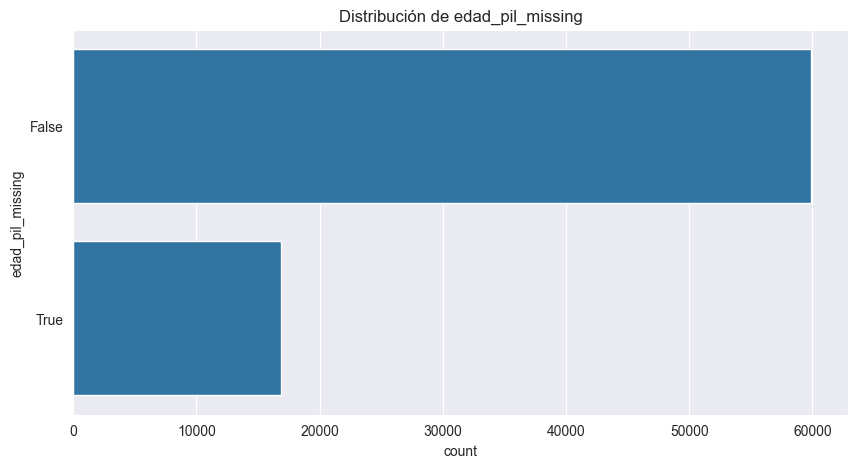

edad_pil_missing
False    0.780473
True     0.219527
Name: proportion, dtype: float64


In [457]:
for col in categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.show()
    print(df[col].value_counts(normalize=True).sort_values(ascending=False))

#### Numéricas

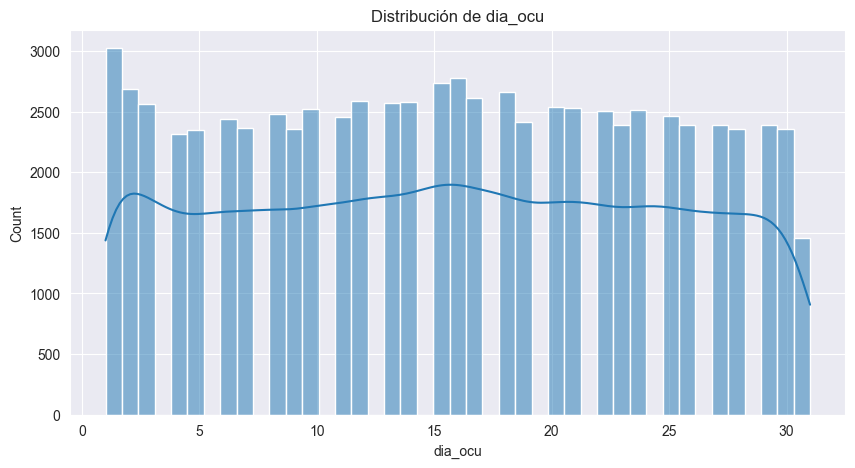

count    76765.000000
mean        15.623162
std          8.806435
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: dia_ocu, dtype: float64


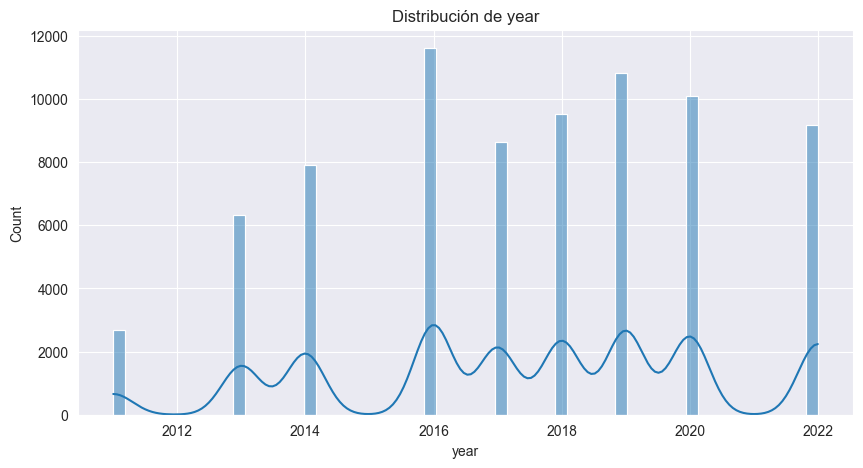

count    76765.000000
mean      2017.398411
std          2.890289
min       2011.000000
25%       2016.000000
50%       2018.000000
75%       2020.000000
max       2022.000000
Name: year, dtype: float64


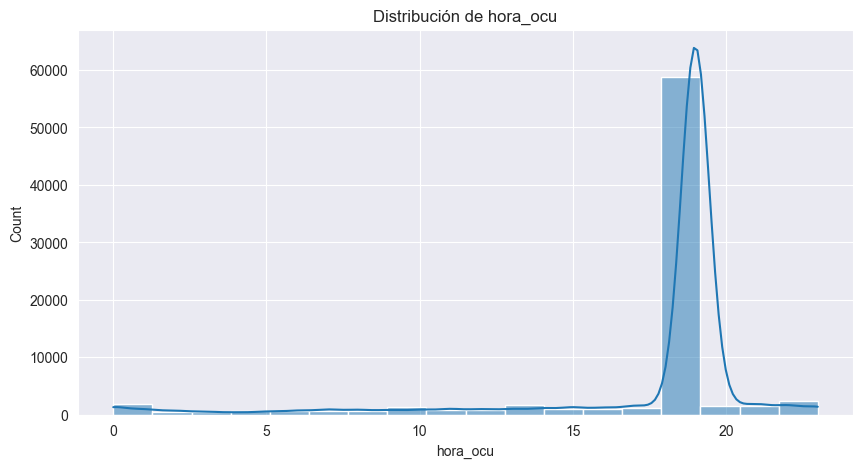

count    76765.000000
mean        17.542448
std          4.350162
min          0.000000
25%         19.000000
50%         19.000000
75%         19.000000
max         23.000000
Name: hora_ocu, dtype: float64


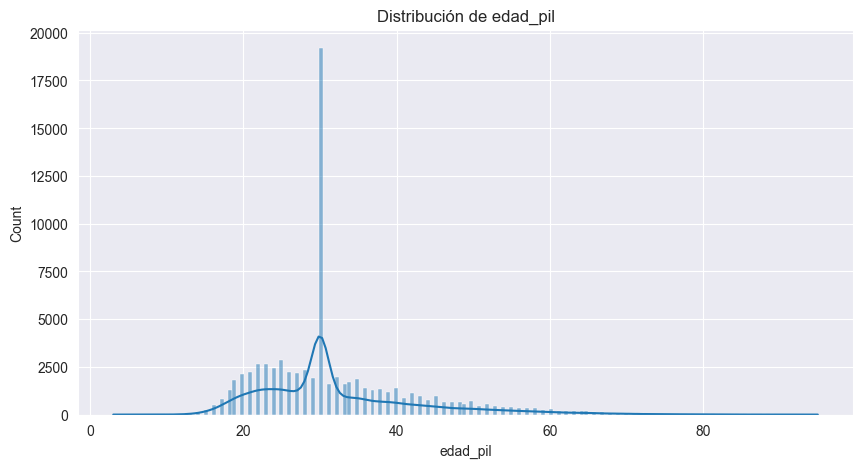

count    76765.000000
mean        32.273067
std         10.743334
min          3.000000
25%         25.000000
50%         30.000000
75%         36.000000
max         95.000000
Name: edad_pil, dtype: float64


In [458]:
for col in numerical:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()
    print(df[col].describe())